<a href="https://colab.research.google.com/github/vegorovmsk/ml_beginner_level/blob/master/jun_ml_linear_regression_II_hw_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Урок 8. Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [120]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_test.shape[1]

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = scaler.fit_transform(y_test.reshape(-1, 1)).ravel()

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.spatial import distance

Итерации остановлены на шаге 1550
Значение r2 0.4838027620955304


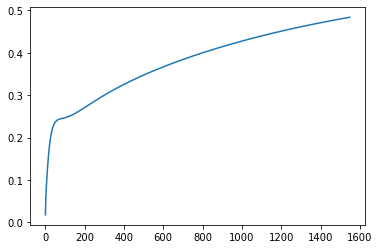

In [169]:
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.0000019, 
                             fit_intercept=True, random_state=44)

w_current, epsilon = np.random.random(X_test.shape[1]), 0.0001
weight_evolution, r2_evolution = [], []

for step in range(10000):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1] < epsilon:
        print("Итерации остановлены на шаге {}".format(step))
        print("Значение r2 {}".format(r2_score(y_test, sgd_regressor.predict(X_test))))
        break
    r2_evolution.append(r2_score(y_test, sgd_regressor.predict(X_test)))
    if r2_evolution[-1] < 0:
        break
    w_current = sgd_regressor.coef_.copy()
     
plt.plot(range(step), r2_evolution)
plt.show()

Пройдено большое количество итераций, при этом получено достаточно низкое качество модели.

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.